In [ ]:
###############################################################
# Workshop: Linear Mixed Models (LMM) in R
# Example: Tree growth of evergreen vs. deciduous species
###############################################################

# Research Question:
# Do evergreen species grow more or less than deciduous species,
# while accounting for tree height and species-level variation?

# Hypotheses:
# H0: Evergreen and deciduous species show no difference in growth.
# H1: Evergreen and deciduous species differ in growth rates.

# Overall Objective:
# To introduce the use of Linear Mixed Models (LMM) for hierarchical data.

# Specific Objectives:
# - Explore the dataset (EDA).
# - Compare linear fixed-effect models with LMM.
# - Evaluate assumptions (normality, homoscedasticity).
# - Interpret results using coefficients, random effects, and R².
# - Visualize predictions and residuals.

# Dataset description:
# growth : Tree growth in diameter (mm/year) - numeric variable
# sp     : Species identifier (e.g., sp01, sp02...) - categorical
# pft    : Plant Functional Type (deciduous / evergreen) - categorical
# height : Tree height (m) - numeric variable

###############################################################
# 1) Libraries (only essential ones)
###############################################################

# List of required packages with explanations
# (Comments are added right after each name)
required_packages <- c(
  "lme4",        # Core package for fitting linear mixed-effects models (LMMs)
  "lmerTest",    # Extends lme4 by providing p-values for fixed effects
  "ggplot2",     # Data visualization
  "car",         # Used here for Levene’s test)
  "performance", # Tools for model evaluation and diagnostics (R², checks, etc.)
  "viridis",     # Colorblind-friendly palettes for plots
  "patchwork",    # Combine multiple ggplot2 plots into one layout
  "googledrive"  # Access file from googledrive in colab
)

# Install any that are missing
installed <- required_packages %in% rownames(installed.packages())
if (any(!installed)) {
  install.packages(required_packages[!installed])
}

# Load all libraries
lapply(required_packages, library, character.only = TRUE)


[[1]]
 [1] "googledrive" "patchwork"   "viridis"     "viridisLite" "performance"
 [6] "car"         "carData"     "ggplot2"     "lmerTest"    "lme4"       
[11] "Matrix"      "stats"       "graphics"    "grDevices"   "utils"      
[16] "datasets"    "methods"     "base"       

[[2]]
 [1] "googledrive" "patchwork"   "viridis"     "viridisLite" "performance"
 [6] "car"         "carData"     "ggplot2"     "lmerTest"    "lme4"       
[11] "Matrix"      "stats"       "graphics"    "grDevices"   "utils"      
[16] "datasets"    "methods"     "base"       

[[3]]
 [1] "googledrive" "patchwork"   "viridis"     "viridisLite" "performance"
 [6] "car"         "carData"     "ggplot2"     "lmerTest"    "lme4"       
[11] "Matrix"      "stats"       "graphics"    "grDevices"   "utils"      
[16] "datasets"    "methods"     "base"       

[[4]]
 [1] "googledrive" "patchwork"   "viridis"     "viridisLite" "performance"
 [6] "car"         "carData"     "ggplot2"     "lmerTest"    "lme4"       
[11] "Matrix"      "stats"       "graphics"    "grDevices"   "utils"      
[16] "datasets"    "methods"     "base"       

[[5]]
 [1] "googledrive" "patchwork"   "viridis"     "viridisLite" "performance"
 [6] "car"         "carData"     "ggplot2"     "lmerTest"    "lme4"       
[11] "Matrix"      "stats"       "graphics"    "grDevices"   "utils"      
[16] "datasets"    "methods"     "base"       

[[6]]
 [1] "googledrive" "patchwork"   "viridis"     "viridisLite" "performance"
 [6] "car"         "carData"     "ggplot2"     "lmerTest"    "lme4"       
[11] "Matrix"      "stats"       "graphics"    "grDevices"   "utils"      
[16] "datasets"    "methods"     "base"       

[[7]]
 [1] "googledrive" "patchwork"   "viridis"     "viridisLite" "performance"
 [6] "car"         "carData"     "ggplot2"     "lmerTest"    "lme4"       
[11] "Matrix"      "stats"       "graphics"    "grDevices"   "utils"      
[16] "datasets"    "methods"     "base"       

[[8]]
 [1] "googledrive" "patchwork"   "viridis"     "viridisLite" "performance"
 [6] "car"         "carData"     "ggplot2"     "lmerTest"    "lme4"       
[11] "Matrix"      "stats"       "graphics"    "grDevices"   "utils"      
[16] "datasets"    "methods"     "base"

In [ ]:
###############################################################
# 2) Import and Explore the Data (Google Colab version)
###############################################################

# Step 1: Authenticate and connect to your Google account
drive_auth()

# Authenticate once
drive_auth()

# Download the file into Colab's local storage
drive_download("Colab Notebooks/tree_dataset.csv", path = "tree_dataset.csv", overwrite = TRUE)

# Now read it locally
dataset <- read.table("tree_dataset.csv", sep = ";", header = TRUE)

# Explore dataset
head(dataset)              # Show the first 6 rows
unique(dataset$sp)         # List all unique species codes
unique(dataset$pft)        # List the unique plant functional types
summary(dataset)           # Summary stats (growth, height, etc.)


The googledrive package is requesting access to your Google account.
Enter '1' to start a new auth process or select a pre-authorized account.
1: Send me to the browser for a new auth process.
2: carine.klaubergs@ufl.edu


Selection: 2


The googledrive package is requesting access to your Google account.
Enter '1' to start a new auth process or select a pre-authorized account.
1: Send me to the browser for a new auth process.
2: carine.klaubergs@ufl.edu


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=78b7ddfda78c2294ab8d7ee74a3e8841&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVZNQnNKZ201MXk5OEpucVZGX3l6bHV3anQweU80RVR0WFhsMkUzSks5MnhRYm94eGtkWXBRVzlrRlhhYXNtVkF1blVqQSIsInN0YXRlIjoiNzhiN2RkZmRhNzhjMjI5NGFiOGQ3ZWU3NGEzZTg4NDEifQ==


File downloaded:

• tree_dataset.csv <id: 1cac9zpYOR-hbpRblAXaNsrDynS6nD4jI>

Saved locally as:

• tree_dataset.csv



,growth,sp,pft,height
,<dbl>,<chr>,<chr>,<dbl>
1,0.6418726,sp01,deciduous,14.14
2,0.7516172,sp01,deciduous,17.53
3,1.0683803,sp01,deciduous,25.66
4,0.8559022,sp01,deciduous,18.63
5,0.9978498,sp01,deciduous,23.33
6,0.9342241,sp01,deciduous,21.34


[1] "sp01" "sp02" "sp03" "sp04" "sp05" "sp06" "sp07" "sp08" "sp09" "sp10"

[1] "deciduous" "evergreen"

     growth            sp                pft                height     
 Min.   :0.2979   Length:100         Length:100         Min.   :10.18  
 1st Qu.:0.7955   Class :character   Class :character   1st Qu.:13.53  
 Median :1.0879   Mode  :character   Mode  :character   Median :16.76  
 Mean   :1.2094                                         Mean   :17.46  
 3rd Qu.:1.4451                                         3rd Qu.:21.49  
 Max.   :2.6150                                         Max.   :25.83  

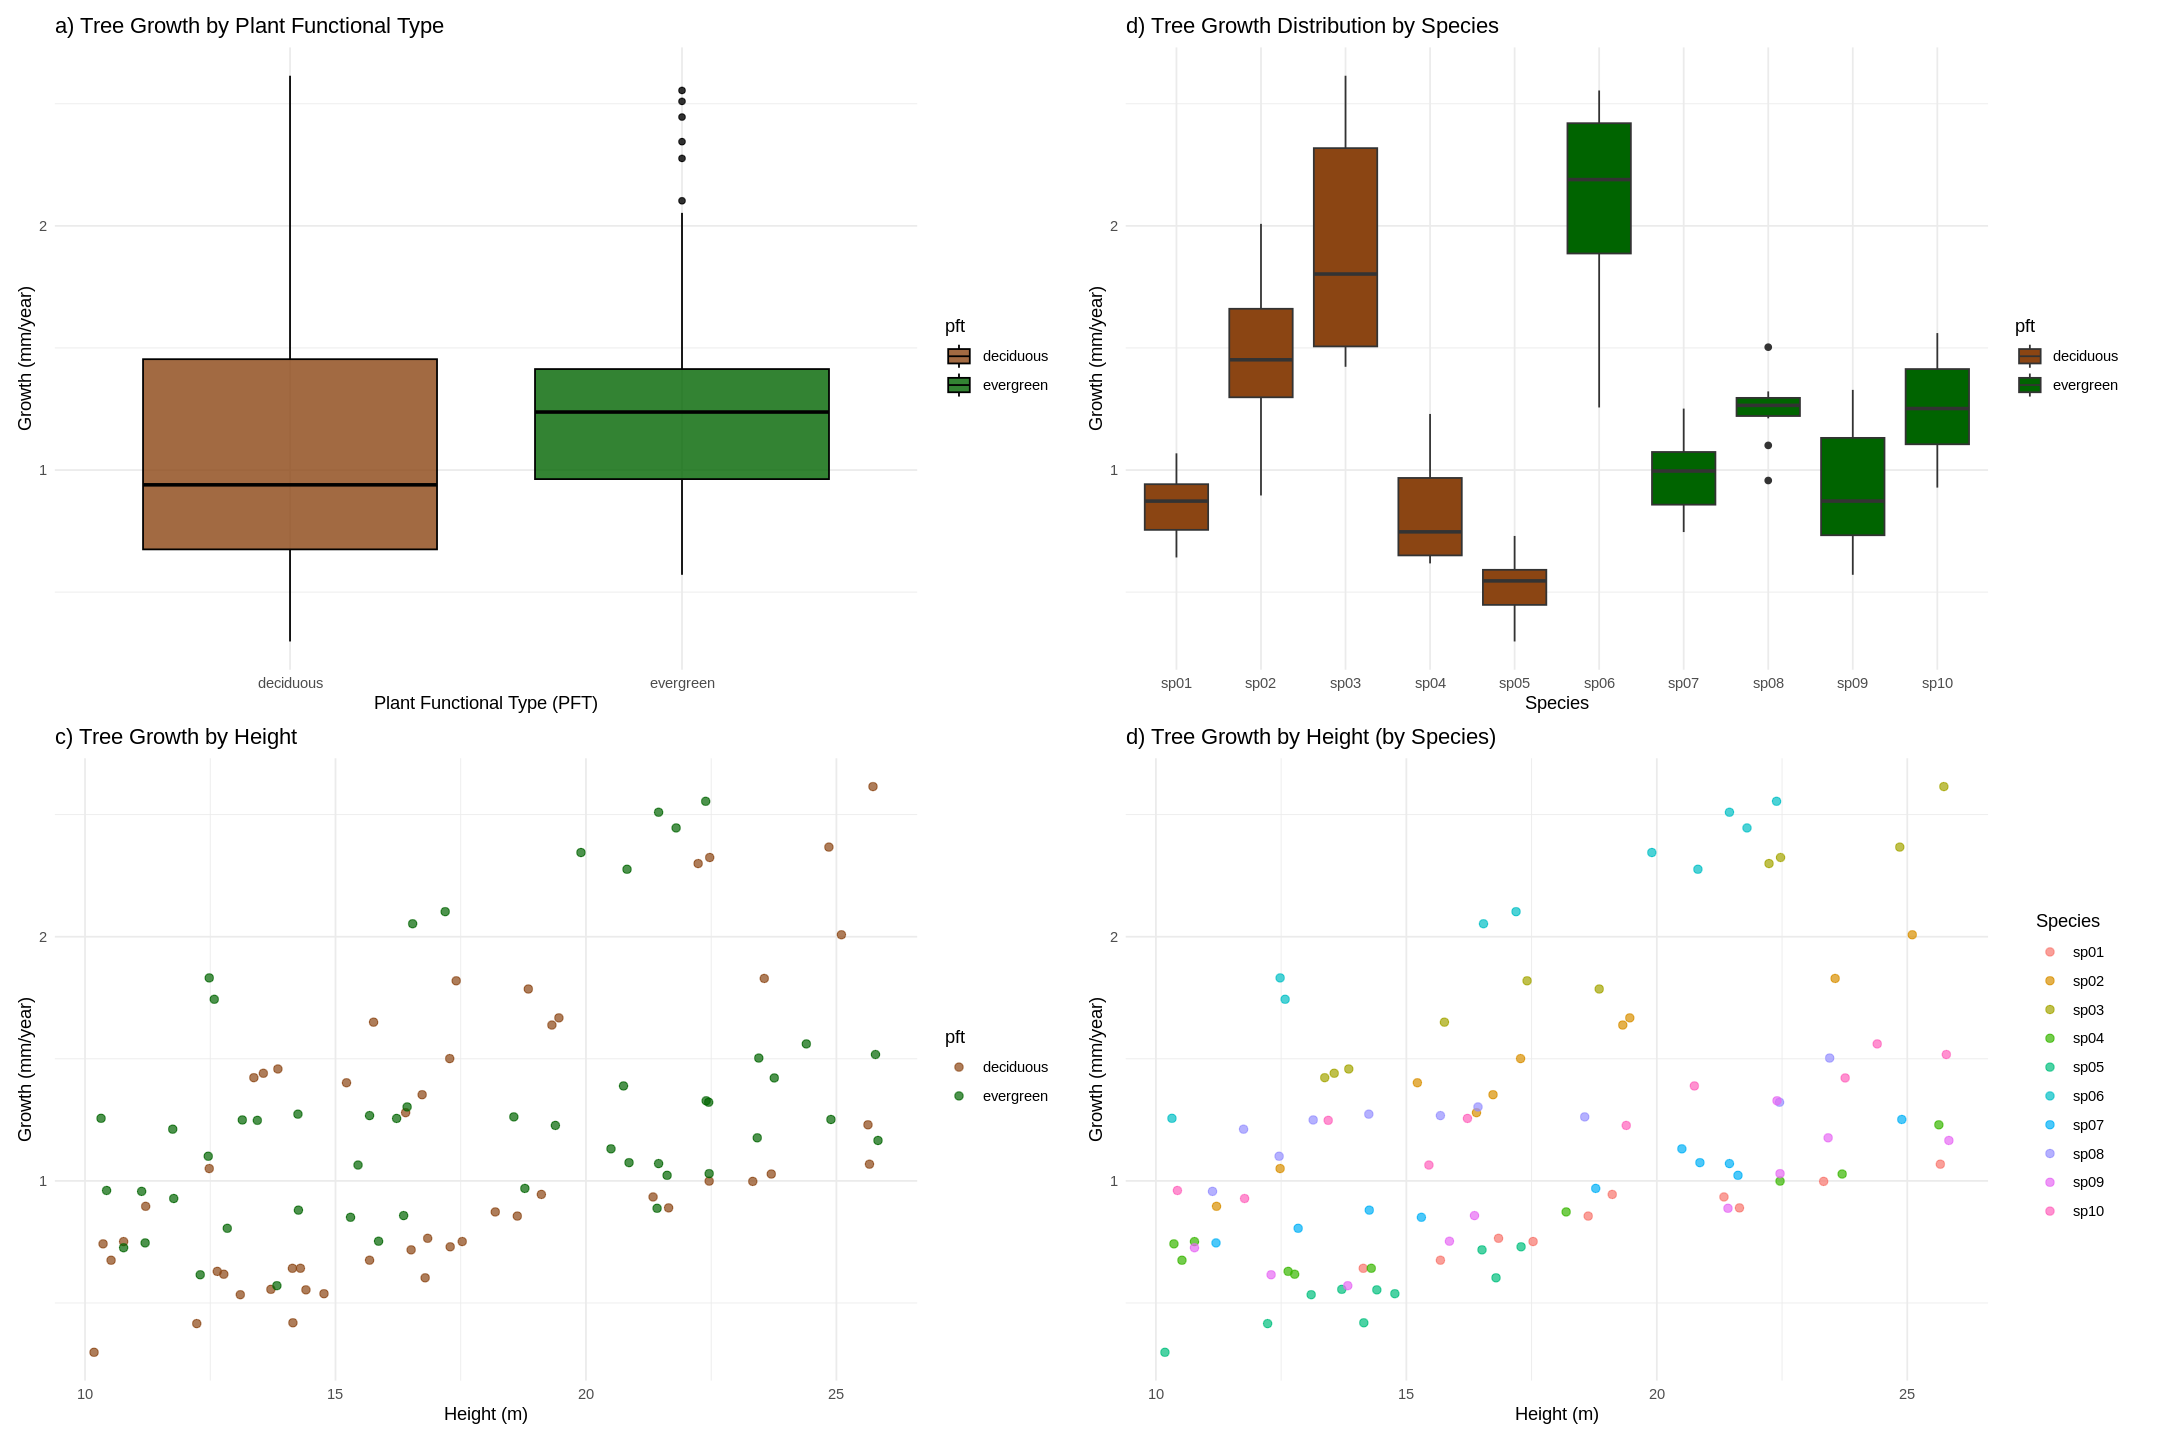

In [ ]:
###############################################################
# 2) Exploratory Plots
###############################################################

# Boxplot: Tree growth by plant functional type (PFT)
# Boxes are filled with green (evergreen) and brown (deciduous)
p1 <- ggplot(dataset, aes(x = pft, y = growth, fill = pft)) +
  geom_boxplot(alpha = 0.8, color = "black") +              # black outline, colored fill
  scale_fill_manual(values = c("evergreen" = "darkgreen",
                               "deciduous" = "saddlebrown")) +  # custom colors
  theme_minimal() +                                         # clean minimal theme
  labs(title = "a) Tree Growth by Plant Functional Type",      # plot title
       x = "Plant Functional Type (PFT)",                   # x-axis label
       y = "Growth (mm/year)")                              # y-axis label

# Boxplot: Distribution of growth by species
# Boxes are filled by plant functional type (pft)
p2<-ggplot(dataset, aes(x = sp, y = growth, fill = pft)) +
  geom_boxplot() +                                          # draw boxplots
  scale_fill_manual(values = c("evergreen" = "darkgreen",
                               "deciduous" = "saddlebrown")) +  # custom colors
  theme_minimal() +                                         # clean minimal theme
  labs(title = "d) Tree Growth Distribution by Species",       # plot title
       x = "Species", y = "Growth (mm/year)")               # axis labels

# Scatterplot: Tree growth vs. height
# Points are colored by plant functional type (pft)
p3<-ggplot(dataset, aes(x = height, y = growth, color = pft)) +
  geom_point(size = 2, alpha = 0.7) +                       # add points (semi-transparent)
  scale_color_manual(values = c("evergreen" = "darkgreen",
                               "deciduous" = "saddlebrown")) +  # custom colors
  theme_minimal() +                                         # clean minimal theme
  labs(title = "c) Tree Growth by Height",            # plot title
       x = "Height (m)", y = "Growth (mm/year)")            # axis labels


# Scatterplot: Tree growth vs. height
# Points are colored by species type (sp)
p4 <- ggplot(dataset, aes(x = height, y = growth, color = sp)) +
  geom_point(size = 2, alpha = 0.7) +                          # species points
  theme_minimal() +
  labs(title = "d) Tree Growth by Height (by Species)",         # title
       x = "Height (m)", y = "Growth (mm/year)",                # axis labels
       color = "Species")                                       # legend title


options(repr.plot.width = 18, repr.plot.height = 12)
# Combine diagnostic plots in a 2x2 grid
(p1 | p2) / (p3 | p4) #

In [ ]:
###############################################################
# 2) Baseline Linear Model (No Random Effects)
###############################################################

# Step 0: Simple linear regression model (fixed effects only)
# This ignores the species grouping structure.
# It assumes all observations are independent, which is not true.
# -> Risk: underestimates standard errors and inflates Type I error.
lm_fixed <- lm(growth ~ height + pft, data = dataset)
summary(lm_fixed)

# Note:
# lm_fixed gives us a baseline, but it does not account for
# species-level variation. We need mixed models to properly handle
# the hierarchical structure (trees nested within species).

###############################################################
# 3) Linear Mixed-Effects Model Selection
###############################################################

# Step 1: Full mixed model (random slope + intercept for species)
# --------------------------------------------------------------
# Fixed effects:
#   - height (continuous predictor of growth, in meters)
#   - pft (plant functional type: deciduous vs evergreen)
#   - height:pft interaction (tests whether the slope of growth vs. height
#     differs between deciduous and evergreen species)
#
# Random effects:
#   - (height | sp): allows each species (sp) to have:
#       * its own intercept (baseline growth)
#       * its own slope with respect to height
#   This structure captures both baseline differences among species
#   and species-specific responses to tree height.
#
# Model formula:
lmm_full <- lmer(growth ~ height + pft + height:pft + (height | sp), data = dataset)
summary(lmm_full)

# --------------------------------------------------------------
# Notes on fixed effects coding:
# --------------------------------------------------------------
# - R encodes categorical variables (factors) with dummy variables.
# - The first level (alphabetical by default) is used as the "reference".
# - Here, pft has two levels: "deciduous" (reference) and "evergreen".
#   → "pftevergreen" means the difference for evergreen species relative
#     to deciduous.
#
# Interpretation of coefficients:
# - (Intercept): expected growth for deciduous species at height = 0.
# - height: slope of growth vs. height for deciduous species.
# - pftevergreen: difference in baseline growth between evergreen
#                 and deciduous species.
# - height:pftevergreen: difference in slope of height effect between
#                        evergreen and deciduous species.


# Step 2: Random intercept model (simpler random structure)
# Fixed effects:
#   - height (continuous predictor of growth)
#   - pft (plant functional type: deciduous vs evergreen)
#   - height:pft interaction (does the effect of height differ by PFT?)
# Random effects:
#   - (1 | sp): only the intercept varies by species,
#     meaning species differ in baseline growth but share the same slope.
# Notes:
#   This is simpler than the random slope model, because it assumes
#   all species respond to height in the same way (parallel lines),
#   but they may start from different baseline levels of growth.
lmm_ri <- lmer(growth ~ height + pft + height:pft + (1 | sp), data = dataset)   # fit LMM with random intercept only
summary(lmm_ri)                                                    # show summary of fixed + random effects

# Compare random slope vs random intercept
anova(lmm_full, lmm_ri, refit = FALSE)                             # likelihood ratio test: slope vs intercept
# If p < 0.05 → keep random slopes
# If p > 0.05 → random intercept is sufficient

# Step 3: Remove interaction (height:pft)
lmm_no_interaction <- lmer(growth ~ height + pft + (height | sp), data = dataset)  # drop interaction term
anova(lmm_full, lmm_no_interaction)                                                # test if interaction is significant
# If p > 0.05 → interaction not needed, keep simpler model

# Step 4: Remove plant functional type effect (pft)
lmm_no_pft <- lmer(growth ~ height + (height | sp), data = dataset)   # drop pft (evergreen/deciduous) effect
anova(lmm_no_pft, lmm_no_interaction)                                 # compare with model including pft
# If p < 0.05 → pft effect matters, keep in model

# Step 5: Remove height effect
lmm_no_height <- lmer(growth ~ pft + (height | sp), data = dataset)   # drop height effect
anova(lmm_no_interaction, lmm_no_height)                              # compare with model including height
# If p < 0.05 → height matters, keep in model

# Final chosen model
final_model <- lmm_no_interaction                                      # assign the selected best model
summary(final_model)                                                   # show results (coefficients, SE, p-values)
fixef(final_model)                                                     # extract fixed effects only

# Explanation:
#
# Intercept (0.124)
# This is the baseline growth rate (in mm/year) for the reference group (deciduous species) when tree height = 0.
# (Of course, height = 0 is not realistic, but it anchors the model.)
#
# height (0.0513)
# For every 1 meter increase in tree height, tree growth increases by about 0.051 mm/year (on average, across species).
# This slope applies to both deciduous and evergreen species.
#
# pftevergreen (0.3623)
# Evergreen species grow, on average, 0.36 mm/year more than deciduous species (the reference group), after accounting for tree height.
# This shows the functional type effect.
#
# So, the model equation can be written as:
#
#   Deciduous species:
#   Growth = 0.124 + 0.051 × Height
#
# Evergreen species:
#   Growth = (0.124 + 0.362) + 0.051 × Height
# Growth = 0.486 + 0.051 × Height




Call:
lm(formula = growth ~ height + pft, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6271 -0.3814 -0.1788  0.3586  1.0174 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.13900    0.18909   0.735   0.4640    
height        0.05669    0.01025   5.529 2.72e-07 ***
pftevergreen  0.16160    0.09418   1.716   0.0894 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4705 on 97 degrees of freedom
Multiple R-squared:  0.2616,	Adjusted R-squared:  0.2464 
F-statistic: 17.19 on 2 and 97 DF,  p-value: 4.081e-07


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: growth ~ height + pft + height:pft + (height | sp)
   Data: dataset

REML criterion at convergence: -121.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.59205 -0.57506  0.00258  0.62308  3.01476 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr
 sp       (Intercept) 0.0409523 0.20237      
          height      0.0006224 0.02495  0.03
 Residual             0.0073655 0.08582      
Number of obs: 100, groups:  sp, 10

Fixed effects:
                    Estimate Std. Error       df t value Pr(>|t|)   
(Intercept)          0.11721    0.10767  8.37205   1.089  0.30666   
height               0.05699    0.01166  8.35778   4.886  0.00107 **
pftevergreen         0.37304    0.14890  7.82085   2.505  0.03728 * 
height:pftevergreen -0.01109    0.01636  8.12116  -0.678  0.51669   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: growth ~ height + pft + height:pft + (1 | sp)
   Data: dataset

REML criterion at convergence: -52.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9139 -0.5964  0.0008  0.5473  2.2598 

Random effects:
 Groups   Name        Variance Std.Dev.
 sp       (Intercept) 0.24249  0.4924  
 Residual             0.01803  0.1343  
Number of obs: 100, groups:  sp, 10

Fixed effects:
                     Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)          0.123663   0.234932 10.186083   0.526   0.6099    
height               0.057576   0.004610 88.260450  12.489   <2e-16 ***
pftevergreen         0.385739   0.330776 10.011122   1.166   0.2706    
height:pftevergreen -0.012718   0.006202 88.167459  -2.051   0.0433 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) height pftvrg
height      -0.339    

,npar,AIC,BIC,logLik,-2*log(L),Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lmm_ri,6,-40.30169,-24.67067,26.15084,-52.30169,NA,NA,NA
lmm_full,8,-105.23892,-84.39756,60.61946,-121.23892,68.93723,2,1.072682e-15


refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,-2*log(L),Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lmm_no_interaction,7,-126.6926,-108.4564,70.34628,-140.6926,NA,NA,NA
lmm_full,8,-125.2099,-104.3685,70.60494,-141.2099,0.5173219,1,0.4719863


refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,-2*log(L),Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lmm_no_pft,6,-123.1063,-107.4752,67.55313,-135.1063,NA,NA,NA
lmm_no_interaction,7,-126.6926,-108.4564,70.34628,-140.6926,5.586288,1,0.01810162


refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,-2*log(L),Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lmm_no_height,6,-111.4293,-95.7983,61.71466,-123.4293,NA,NA,NA
lmm_no_interaction,7,-126.6926,-108.4564,70.34628,-140.6926,17.26323,1,3.254232e-05


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: growth ~ height + pft + (height | sp)
   Data: dataset

REML criterion at convergence: -127.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5742 -0.5519  0.0201  0.6350  3.0028 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr
 sp       (Intercept) 0.0399444 0.19986      
          height      0.0005846 0.02418  0.04
 Residual             0.0073747 0.08588      
Number of obs: 100, groups:  sp, 10

Fixed effects:
             Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  0.124179   0.106269 8.454012   1.169 0.274486    
height       0.051339   0.007946 9.177103   6.461 0.000107 ***
pftevergreen 0.362315   0.146754 7.841833   2.469 0.039356 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) height
height      -0.089       
pftevergren -0.721  0.026

(Intercept)       height pftevergreen 
   0.1241793    0.0513392    0.3623146

[1] "Shapiro-Wilk normality test"



	Shapiro-Wilk normality test

data:  res
W = 0.99304, p-value = 0.8905


[1] "Levene’s test for homogeneity of variance"


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,2.735174,0.1013606
,98,NA,NA


# R2 for Mixed Models

  Conditional R2: 0.978
     Marginal R2: 0.275

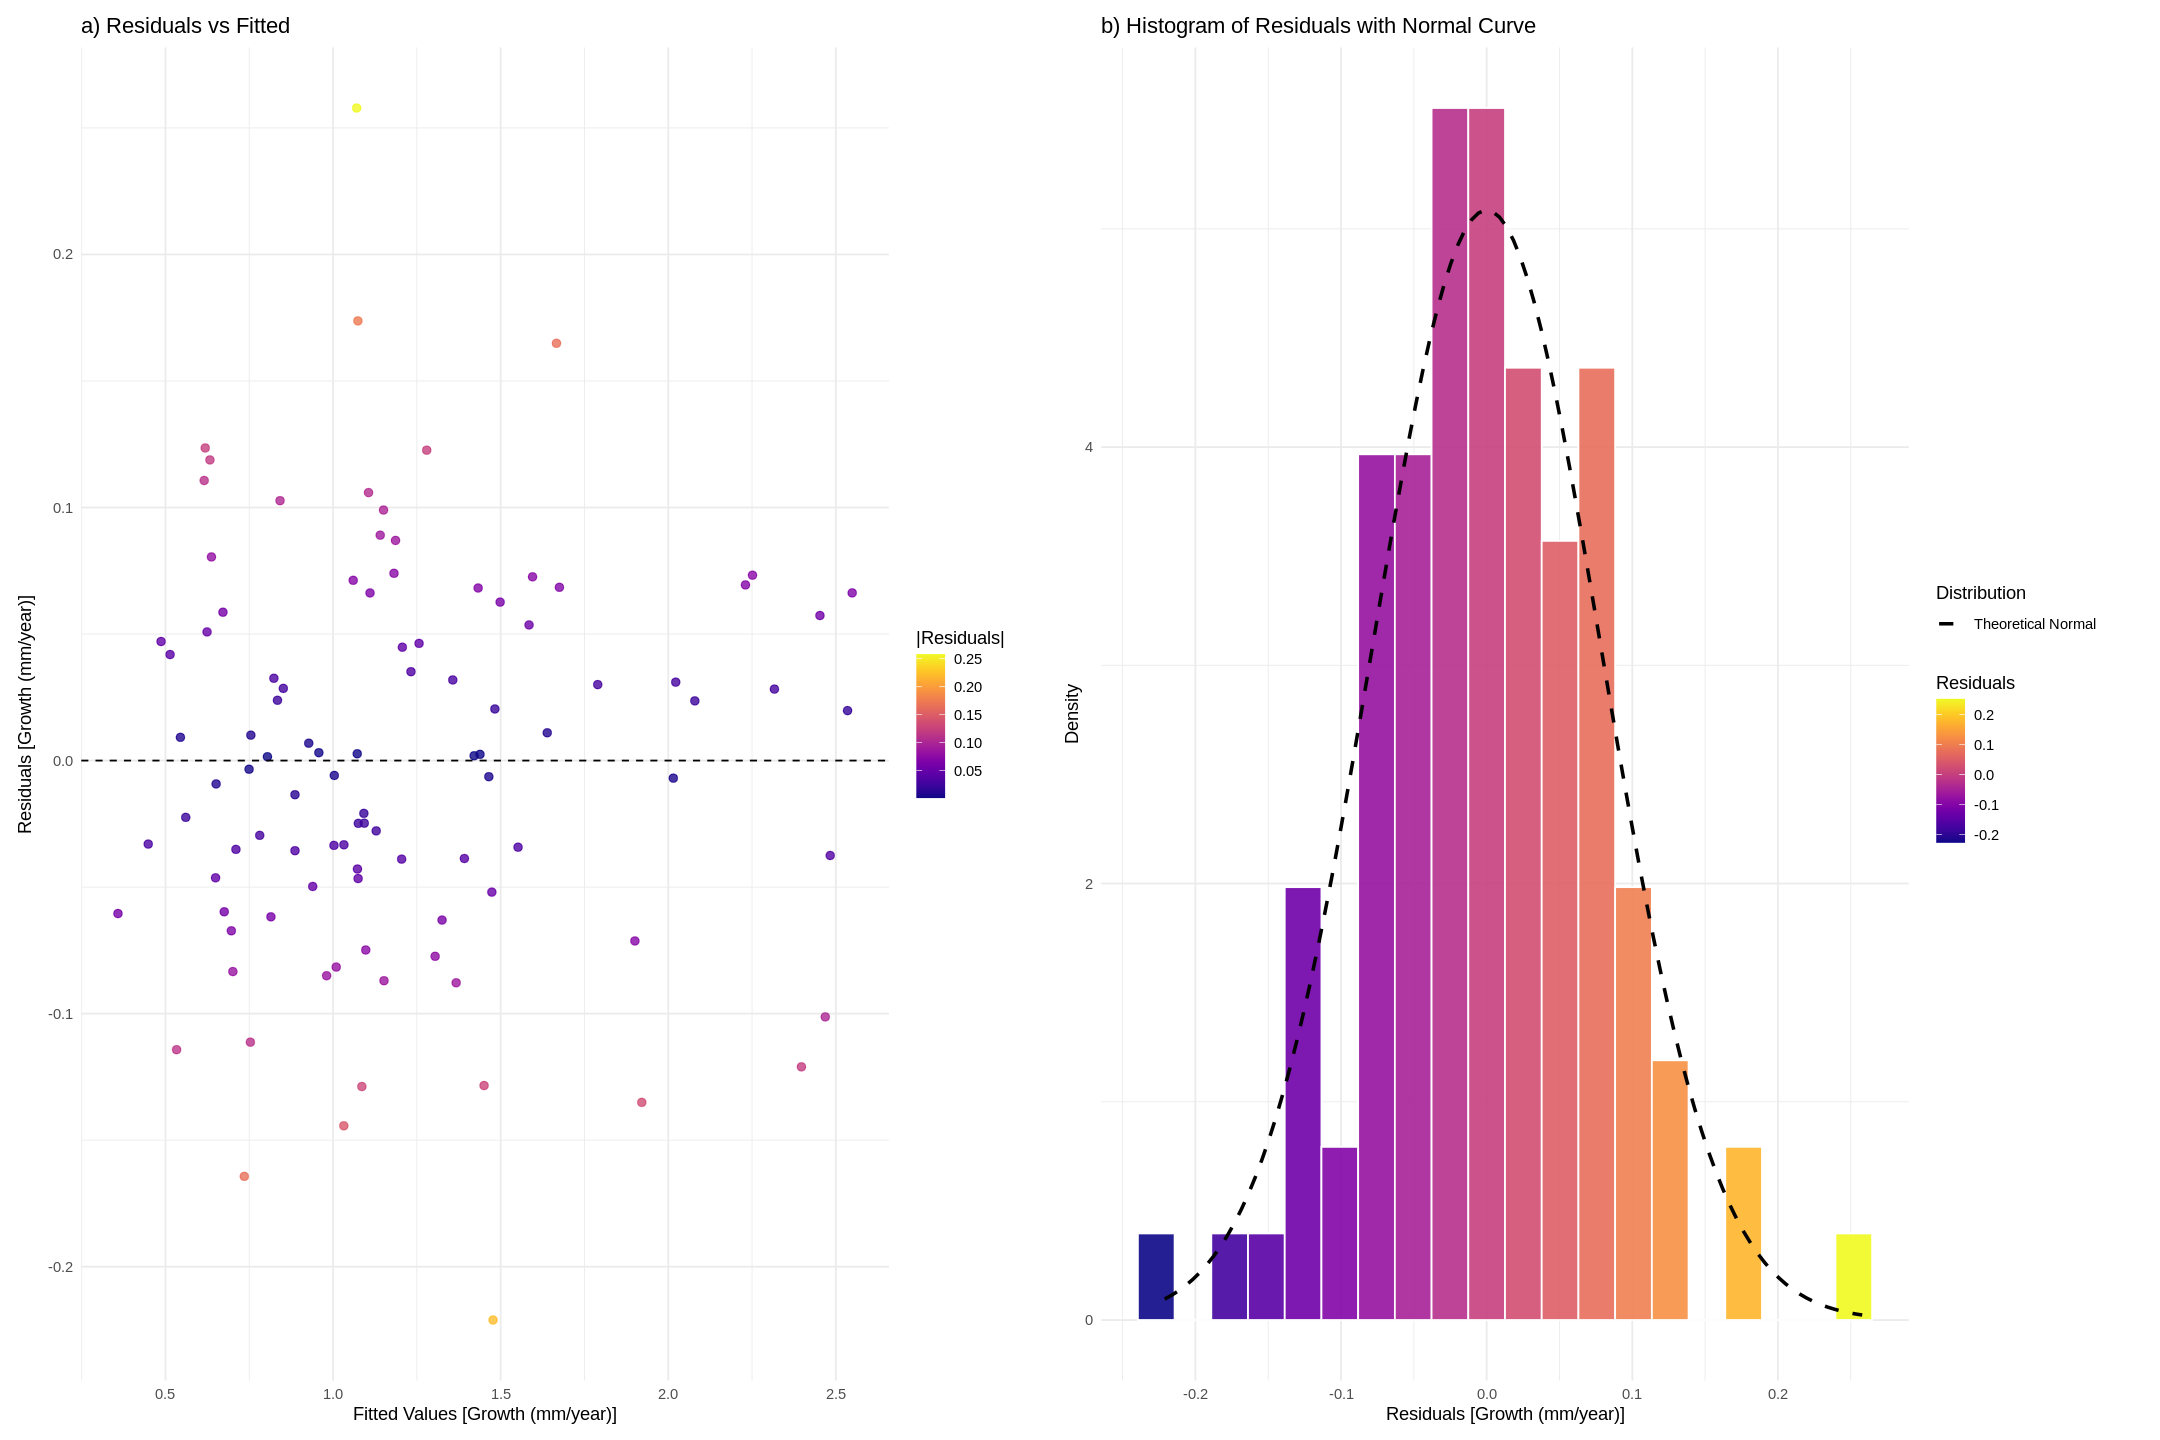

In [ ]:
###############################################################
# 4) Model Diagnostics
###############################################################

# Extract residuals (observed - fitted values)
res <- resid(final_model)

# --------------------------------------------------------------
# Shapiro-Wilk normality test
# --------------------------------------------------------------
# Tests whether residuals are normally distributed.
# Hypotheses:
# H0: Residuals follow a normal distribution.
# H1: Residuals deviate from normality.
# If p > 0.05 → assumption of normality is satisfied.
print("Shapiro-Wilk normality test")
shapiro.test(res)

# --------------------------------------------------------------
# Levene’s test for homogeneity of variance
# --------------------------------------------------------------
# Tests if residual variance is equal across groups (here, PFT).
# Hypotheses:
# H0: Variances are equal across groups (homoscedasticity).
# H1: Variances differ between groups (heteroscedasticity).
# If p > 0.05 → assumption of homogeneity is satisfied.
print("Levene’s test for homogeneity of variance")
leveneTest(res ~ as.factor(dataset$pft))

# --------------------------------------------------------------
# R² for mixed model
# --------------------------------------------------------------
# Computes marginal and conditional R² values.
# - Marginal R² = variance explained by fixed effects only.
# - Conditional R² = variance explained by both fixed + random effects.
r2(final_model)

# --------------------------------------------------------------
# Prepare data for plots
# --------------------------------------------------------------
# Build a data frame with fitted values and residuals for visualization.
residual_df <- data.frame(Fitted = fitted(final_model), Residuals = res)

# --------------------------------------------------------------
# Residuals vs Fitted Plot
# --------------------------------------------------------------
# Purpose: check for systematic patterns in residuals.
# - Ideally: residuals form a random "cloud" around 0 with no trend.
# - Patterns (curves, funnels) may indicate non-linearity or heteroscedasticity.
p5 <- ggplot(residual_df, aes(x = Fitted, y = Residuals, color = abs(Residuals))) +  # x = fitted values, y = residuals, color by residual magnitude
  geom_point(size = 2, alpha = 0.8) +                                                # scatterplot of residuals (semi-transparent points)
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +                 # dashed reference line at 0 (ideal mean of residuals)
  scale_color_viridis(option = "C", direction = 1) +                                 # viridis scale: blue = small residuals, yellow = large
  theme_minimal() +                                                                  # clean background
  labs(title = "a) Residuals vs Fitted",                                                # plot title
       x = "Fitted Values [Growth (mm/year)]",                                       # x-axis = predicted growth
       y = "Residuals [Growth (mm/year)]",                                           # y-axis = observed - predicted
       color = "|Residuals|")                                                        # legend explains color = |residuals|


# --------------------------------------------------------------
# Histogram of Residuals with Normal Curve
# --------------------------------------------------------------
# Purpose: check approximate normality of residuals.
# - A bell-shaped histogram suggests residuals are close to normal.
# - Skewed or multi-modal shapes indicate potential violations.
p6 <- ggplot(residual_df, aes(x = Residuals)) +
  geom_histogram(aes(y = after_stat(density), fill = after_stat(x)),                 # histogram of residuals (scaled to density)
                 bins = 20, color = "white", alpha = 0.9) +                          # 20 bins, white borders, semi-transparent fill

  stat_function(fun = dnorm,                                                         # overlay theoretical normal density curve
                args = list(mean = mean(res), sd = sd(res)),                         # parameters: mean and sd of residuals
                aes(color = "Theoretical Normal"),                                   # label for legend
                linewidth = 1, linetype = "dashed") +                                # dashed black curve

  scale_color_manual(name = "Distribution",                                          # legend for curve
                     values = c("Theoretical Normal" = "black")) +                   # black dashed line

  scale_fill_viridis(option = "C", direction = 1) +                                  # viridis color scale for residuals

  theme_minimal() +                                                                  # clean background

  labs(title = "b) Histogram of Residuals with Normal Curve",                           # plot title
       x = "Residuals [Growth (mm/year)]",                                           # x-axis label
       y = "Density",                                                                # y-axis label
       fill = "Residuals")                                                           # legend for histogram fill


# --------------------------------------------------------------
# Combine diagnostic plots side by side
# --------------------------------------------------------------
(p5 | p6)


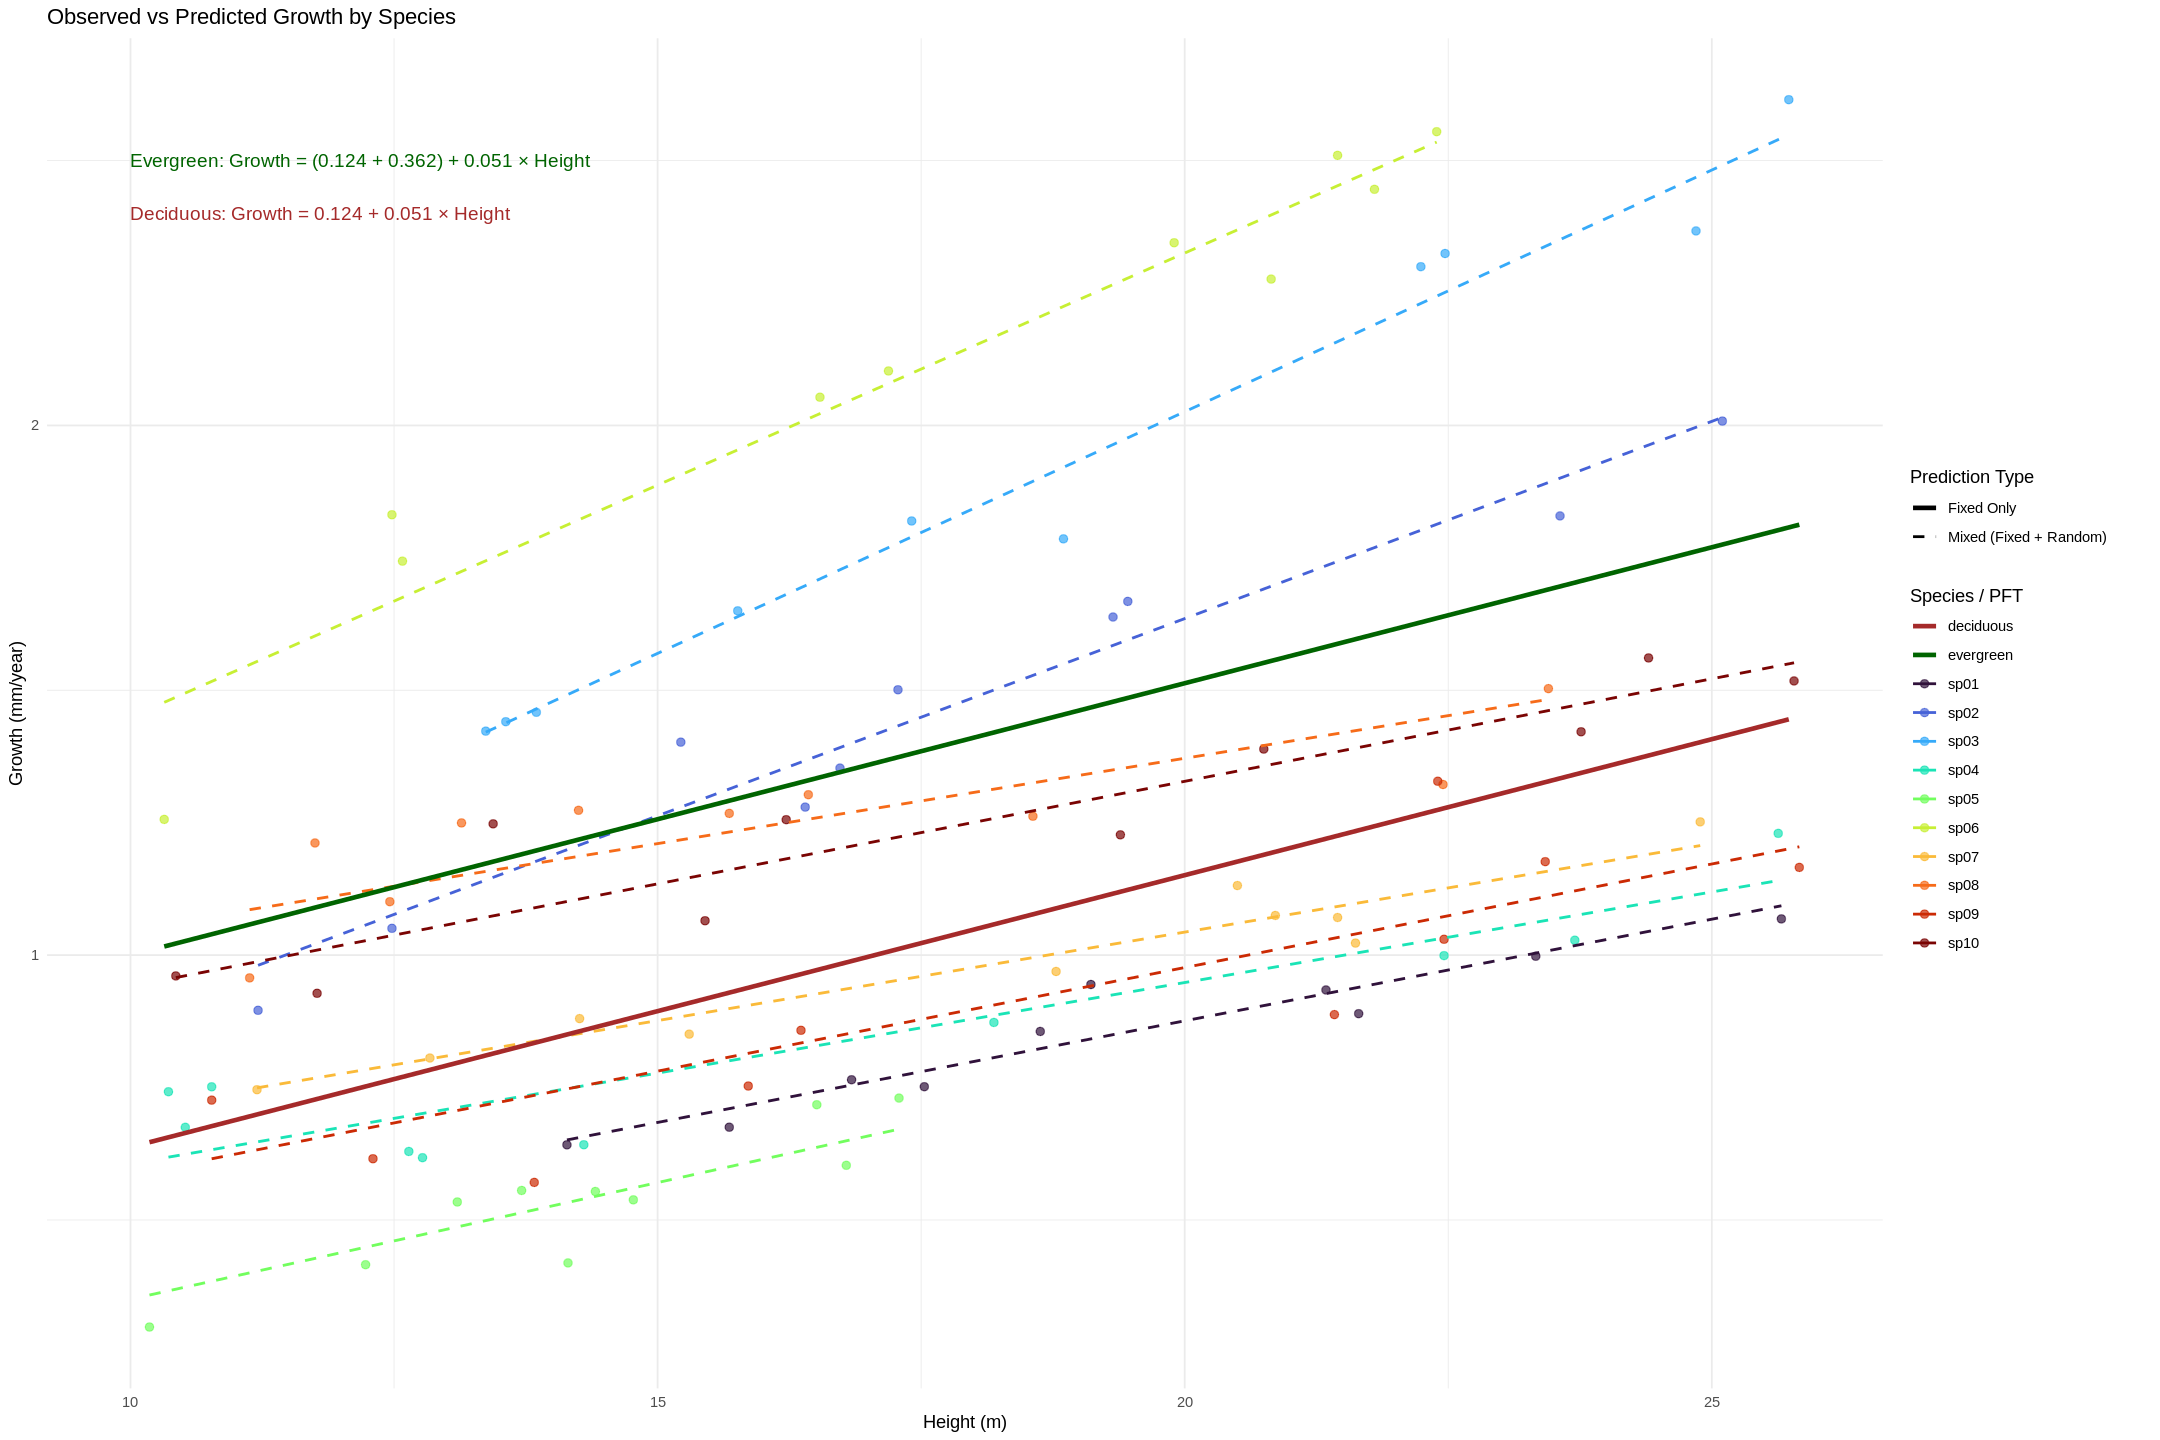

In [ ]:
###############################################################
# 5) Visualization of Predictions (with equations)
###############################################################

# Predictions from the final model
dataset$pred_full  <- predict(final_model)              # predictions with fixed + random effects (species-specific)
dataset$pred_fixed <- predict(final_model, re.form=NA)  # predictions with fixed effects only (ignores species variation)

# Visualization: observed growth + mixed vs fixed predictions
p4<-ggplot() +
  geom_point(data = dataset,                            # plot observed values
             aes(x = height, y = growth, color = sp),   # x = height, y = growth, color = species
             size = 2, alpha = 0.7) +                   # semi-transparent points

  geom_line(data = dataset,                             # plot mixed-effects predictions
            aes(x = height, y = pred_full, group = sp,  # predictions vary by species (grouped)
                color = sp,                             # color lines by species
                linetype = "Mixed (Fixed + Random)"),   # labeled in legend
            size = 0.8) +                               # thinner line for mixed effects

  geom_line(data = dataset,                             # plot fixed-effects predictions
            aes(x = height, y = pred_fixed, group = pft,# predictions by plant functional type (pft)
                color = pft,                            # color lines by deciduous/evergreen
                linetype = "Fixed Only"),               # labeled in legend
            size = 1.3) +                               # thicker line for fixed effects

  scale_linetype_manual(values = c("Fixed Only" = "solid",
                                   "Mixed (Fixed + Random)" = "dashed")) + # define line styles

  scale_color_manual(                                   # set color palettes
    values = c(
      setNames(turbo(length(unique(dataset$sp))), unique(dataset$sp)), # turbo palette for species
      deciduous = "brown", evergreen = "darkgreen"                     # custom colors for PFT
    )
  ) +

  theme_minimal() +                                     # clean theme
  labs(title = "Observed vs Predicted Growth by Species", # plot title
       y = "Growth (mm/year)", x = "Height (m)",         # axis labels
       linetype = "Prediction Type",                     # legend for line types
       color = "Species / PFT") +                        # legend for species and PFT

  # Annotate fixed-effect equations directly on the plot
  annotate("text", x = 10,          # position text at right side
           y = 2.4,                # place near bottom
           label = "Deciduous: Growth = 0.124 + 0.051 × Height", # regression equation for deciduous
           color = "brown", hjust = 0, size = 4) +       # brown text for deciduous

  annotate("text", x = 10,          # position text at right side
           y = 2.5,                # place near top
           label = "Evergreen: Growth = (0.124 + 0.362) + 0.051 × Height", # regression equation for evergreen
           color = "darkgreen", hjust = 0, size = 4)     # green text for evergreen

print(p4) # plot the graphic


###############################################################
# END of Workshop Script
# Key Takeaways:
#
# - Linear Mixed-Effects Models (LMMs) handle hierarchical data:
#   Useful when data are grouped (e.g., trees within species, plots, or sites),
#   capturing both fixed effects (population-level) and random effects (group-level).
#
# - Fixed-effect models (LM) ignore grouping structure:
#   They assume all observations are independent, which can underestimate
#   variability and inflate Type I error rates.
#
# - Model selection is based on ANOVA comparisons:
#   Allows testing which fixed and random effects improve the model.
#   Parsimonious models (simpler but informative) are preferred.
#
# - Model diagnostics are essential:
#   Residual plots check linearity and homoscedasticity,
#   Shapiro-Wilk test and histograms assess normality,
#   and Levene’s test checks homogeneity of variances.
#
# - R² interpretation for mixed models:
#   * Marginal R² = variance explained by fixed effects only.
#   * Conditional R² = variance explained by both fixed + random effects.
#   This distinction shows the added contribution of random effects.
#
# - Visualization enhances interpretation:
#   Scatterplots, residual plots, and fitted vs observed predictions
#   clarify how fixed and random effects contribute to explaining variation.
#
# - Practical insight:
#   In this example, both tree height and plant functional type (PFT: deciduous vs evergreen)
#   were informative predictors of tree growth, while random effects captured
#   species-specific deviations around these general trends.
###############################################################
